# 1. Data Wrangling

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('health care diabetes.csv')

In [5]:
df.shape

(768, 9)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#inference : the dataset contains no null values

In [10]:
#check for duplicated values
df.duplicated().sum()

0

In [ ]:
#inference : the dataset contains no duplicate entries

In [11]:
import matplotlib.pyplot as plt

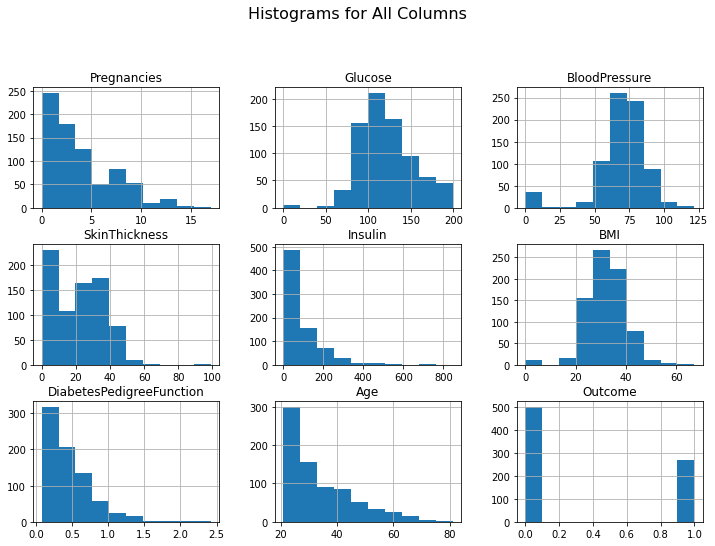

In [12]:
df.hist(bins=10, figsize=(12, 8))
plt.suptitle('Histograms for All Columns', x=0.5, y=1.02, fontsize=16)
plt.show()

In [13]:
zeros_count_per_column = df.eq(0).sum()

print("Number of zeros in each column:")
print(zeros_count_per_column)


Number of zeros in each column:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


The zero enteries represent null value. Thes zero entries are to be replaced with mean or mode.
#### Assumption: As the gender of patients is not given, it is assumed that zero values in Pregnancies represents null value of female patients only.

# Ques 2(b)

In [14]:
# Calculate the column-wise mean excluding zeros
column_means = df[df != 0].replace(0, np.nan).mean()

# Replace zeros with the column mean (excluding 'Outcome')
df[df.columns.difference(['Outcome'])] = df[df.columns.difference(['Outcome'])].replace(0, np.nan)
df = df.fillna(column_means)

print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0       6.000000    148.0           72.0       35.00000  155.548223  33.6   
1       1.000000     85.0           66.0       29.00000  155.548223  26.6   
2       8.000000    183.0           64.0       29.15342  155.548223  23.3   
3       1.000000     89.0           66.0       23.00000   94.000000  28.1   
4       4.494673    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763    10.000000    101.0           76.0       48.00000  180.000000  32.9   
764     2.000000    122.0           70.0       27.00000  155.548223  36.8   
765     5.000000    121.0           72.0       23.00000  112.000000  26.2   
766     1.000000    126.0           60.0       29.15342  155.548223  30.1   
767     1.000000     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

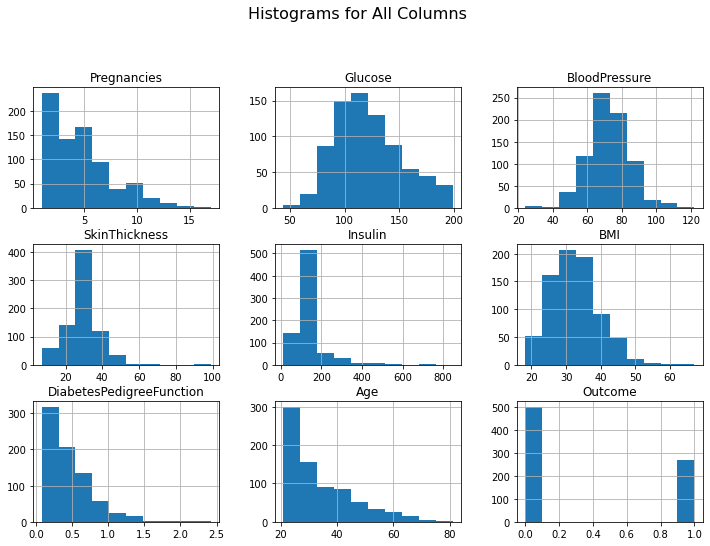

In [15]:
df.hist(bins=10, figsize=(12, 8))
plt.suptitle('Histograms for All Columns', x=0.5, y=1.02, fontsize=16)
plt.show()

In [55]:
# We have calculated the mean for each field, by excluding the zero entries and replaced the zero entries with the corresponding mean.

In [16]:
zeros_count_per_column = df.eq(0).sum()

print("Number of zeros in each column:")
print(zeros_count_per_column)

Number of zeros in each column:
Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


# 2. EDA

In [17]:
df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Univariate Analysis
### Creating a count (frequency) plot describing the data types and the count of variables. 

In [18]:
import seaborn as sns

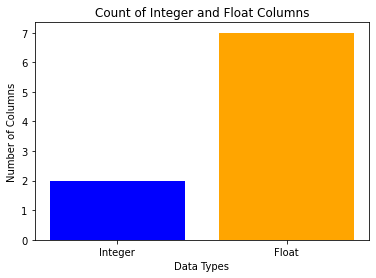

In [19]:
int_columns = df.select_dtypes(include='int').columns
float_columns = df.select_dtypes(include='float').columns

# Count the number of columns in each category
int_count = len(int_columns)
float_count = len(float_columns)

# Plot the count plot
plt.bar(['Integer', 'Float'], [int_count, float_count], color=['blue', 'orange'])
plt.xlabel('Data Types')
plt.ylabel('Number of Columns')
plt.title('Count of Integer and Float Columns')
plt.show()

In [56]:
# inference :  The given data set had 2 integer variables and 7 Float variables.

### Plotting the count of outcomes by their value.

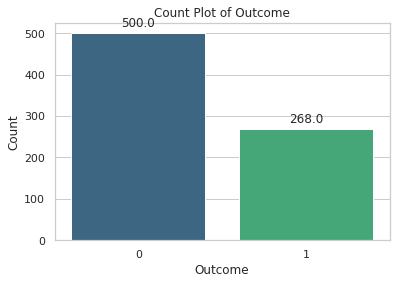

In [59]:
# Create a count plot for the outcome
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="Outcome", data=df,palette='viridis')

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add plot labels and title
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Count Plot of Outcome')

# Show the plot
plt.show()

#### inference : 268 paitents are positive for Diabetes against 500 negative cases. The outcome field may be a little biased towards negative outcomes.

## Bivariate Analysis
### Scatter charts between the pair of variables to understand the relationships.

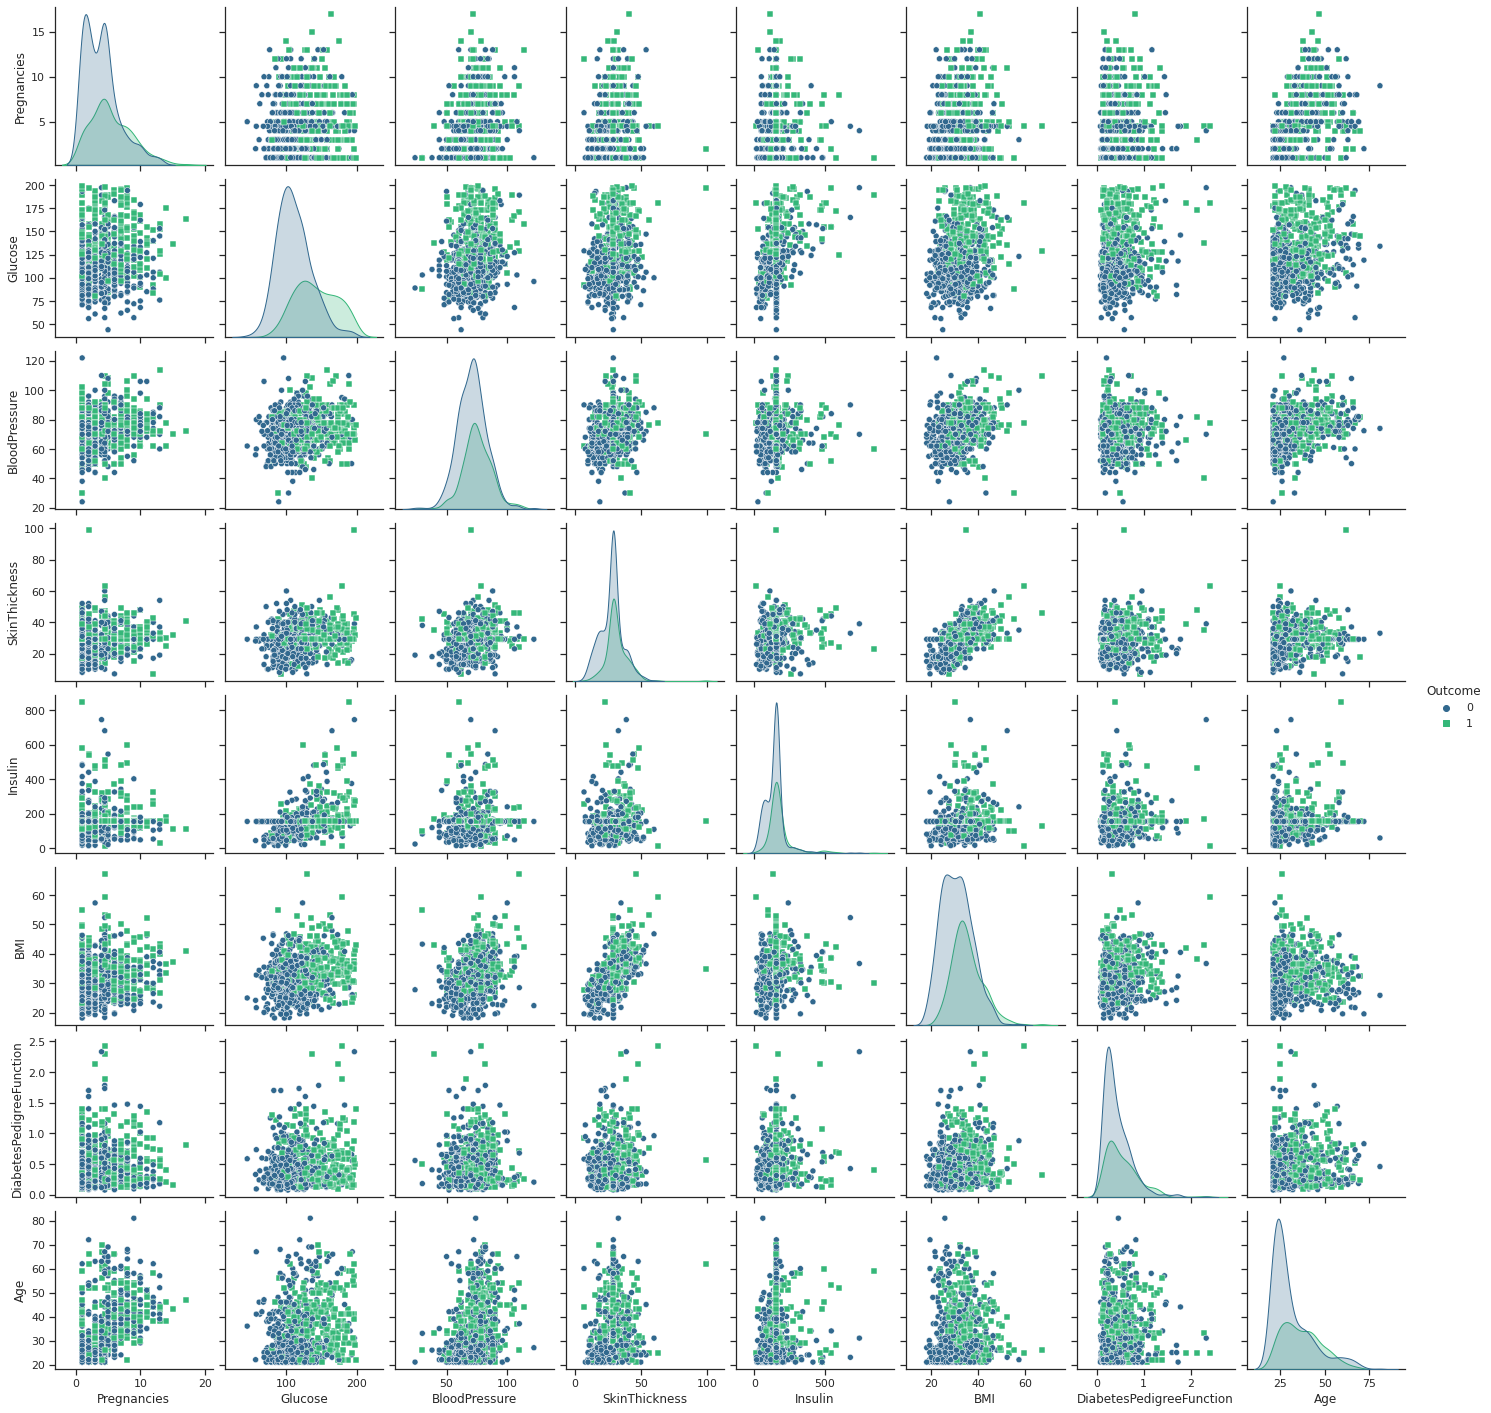

In [21]:
sns.set(style="ticks")
sns.pairplot(df, hue='Outcome', markers=["o", "s"], palette='viridis')
plt.show()

Inference : From the histogram diagrams we can say that other than Glucose and Blood Pressure and other features have a positive skewness. Also, at a given BMI, higher glucose level is observed for diabetic patient.

## Multivariate Analysis
### Correlation analysis, using a heat map.

In [22]:
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.154290       0.259117       0.131819   
Glucose                      0.154290  1.000000       0.218367       0.192991   
BloodPressure                0.259117  0.218367       1.000000       0.192816   
SkinThickness                0.131819  0.192991       0.192816       1.000000   
Insulin                      0.068077  0.420157       0.072517       0.158139   
BMI                          0.110590  0.230941       0.281268       0.542398   
DiabetesPedigreeFunction    -0.005658  0.137060      -0.002763       0.100966   
Age                          0.511662  0.266534       0.324595       0.127872   
Outcome                      0.248263  0.492928       0.166074       0.215299   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.068077  0.110590                 -0.005658   
Glucose              

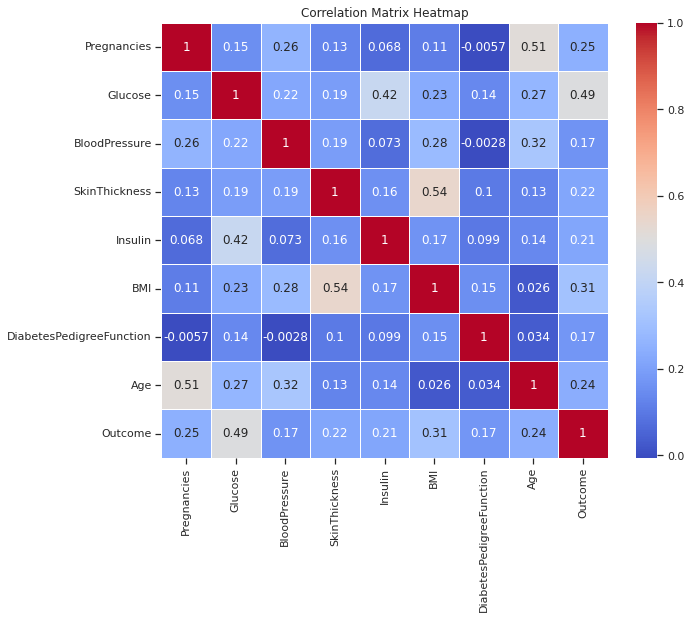

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Inference : The heatmap shows that all variables have positive correlation with the target variable. blood pressue is least correlated and glucose is most correlated with target variable followed by BMI.

# 3. Data Modeling

In [24]:
import sklearn

In [25]:
X=df.drop('Outcome', axis = 1)
Y=df['Outcome']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=32)

In [27]:
X_train.shape

(576, 8)

In [28]:
X_test.shape

(192, 8)

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression()

In [31]:
logmodel.fit(X_train,Y_train)

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [33]:
Y_pred=logmodel.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [34]:
test_results=pd.DataFrame(X_test.copy())
test_results['Y_test'] = Y_test
test_results['predictions']=Y_pred
test_results

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Y_test,predictions
642,6.000000,147.0,80.000000,29.15342,155.548223,29.5,0.178,50,1,0
695,7.000000,142.0,90.000000,24.00000,480.000000,30.4,0.128,43,1,0
453,2.000000,119.0,72.405184,29.15342,155.548223,19.6,0.832,72,0,0
565,2.000000,95.0,54.000000,14.00000,88.000000,26.1,0.748,22,0,0
99,1.000000,122.0,90.000000,51.00000,220.000000,49.7,0.325,31,1,0
...,...,...,...,...,...,...,...,...,...,...
585,1.000000,93.0,56.000000,11.00000,155.548223,22.5,0.417,22,0,0
487,4.494673,173.0,78.000000,32.00000,265.000000,46.5,1.159,58,0,1
58,4.494673,146.0,82.000000,29.15342,155.548223,40.5,1.781,44,0,1
438,1.000000,97.0,70.000000,15.00000,155.548223,18.2,0.147,21,0,0


In [35]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(Y_test, Y_pred)

print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[107  16]
 [ 26  43]]


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(Y_test, Y_pred)

precision = precision_score(Y_test, Y_pred)

recall = recall_score(Y_test, Y_pred)

f1 = f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.78125
Precision: 0.7288135593220338
Recall: 0.6231884057971014
F1 Score: 0.671875


In [37]:
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

results['Model'].append("LogisticRegression")
results['Accuracy'].append(accuracy)
results['Precision'].append(precision)
results['Recall'].append(recall)
results['F1 Score'].append(f1)

### Inference : 
1. Approximately 78% of the predictions made by the model are correct.
2. A precision of 0.72 means that, out of all instances predicted as positive, 72% are truly positive.
3. A recall of 0.623 indicates that the model captures 62.3% of all actual positive instances.
4. An F1 score of 0.671 suggests a reasonable balance between precision and recall, taking into account both false positives and false negatives.

# KNN Model

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
knn_clf.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean')

In [39]:
Y_pred_knn=knn_clf.predict(X_test)
Y_pred_knn

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [40]:
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)

precision_knn = precision_score(Y_test, Y_pred_knn)

recall_knn = recall_score(Y_test, Y_pred_knn)

f1_knn = f1_score(Y_test, Y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

Accuracy: 0.765625
Precision: 0.6764705882352942
Recall: 0.6666666666666666
F1 Score: 0.6715328467153284


In [41]:
results['Model'].append("KNN")
results['Accuracy'].append(accuracy_knn)
results['Precision'].append(precision_knn)
results['Recall'].append(recall_knn)
results['F1 Score'].append(f1_knn)

### Inference :
1. the model correctly predicts the class of instances in the dataset approximately 76% of the time.
2. A precision of 0.67 indicates that, out of all instances predicted as positive, around 67% are truly positive.
3. A recall of 0.66 suggests that the model captures about 66% of all actual positive instances.
4. An F1 score of 0.67 reflects a reasonable balance between precision and recall, considering both false positives and false negatives.

# SVM Algo

In [42]:
from sklearn.svm import SVC

In [43]:
svm=SVC()
svm.fit(X_train,Y_train)

SVC()

In [44]:
Y_pred_svm=svm.predict(X_test)
Y_pred_svm

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [45]:
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)

precision_svm = precision_score(Y_test, Y_pred_svm)

recall_svm = recall_score(Y_test, Y_pred_svm)

f1_svm = f1_score(Y_test, Y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

Accuracy: 0.8020833333333334
Precision: 0.7924528301886793
Recall: 0.6086956521739131
F1 Score: 0.6885245901639344


In [46]:
results['Model'].append("SVM")
results['Accuracy'].append(accuracy_svm)
results['Precision'].append(precision_svm)
results['Recall'].append(recall_svm)
results['F1 Score'].append(f1_svm)

### Inference
1. An accuracy of approximately 80% indicates that the model correctly predicts the class of instances in the dataset the majority of the time.
2. A precision of 0.79 means that, out of all instances predicted as positive, about 79% are truly positive.
3. A recall of 0.60 indicates that the model captures about 60% of all actual positive instances.
4. An F1 score of 0.68 suggests a reasonable balance between precision and recall, considering both false positives and false negatives.

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [48]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [49]:
Y_pred_dt = clf.predict(X_test)
Y_pred_dt

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [50]:
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)

precision_dt = precision_score(Y_test, Y_pred_dt)

recall_dt = recall_score(Y_test, Y_pred_dt)

f1_dt = f1_score(Y_test, Y_pred_dt)

print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

Accuracy: 0.7239583333333334
Precision: 0.6025641025641025
Recall: 0.6811594202898551
F1 Score: 0.6394557823129252


In [51]:
results['Model'].append("Decision Tree")
results['Accuracy'].append(accuracy_dt)
results['Precision'].append(precision_dt)
results['Recall'].append(recall_dt)
results['F1 Score'].append(f1_dt)

### Inference :
1. The model correctly predicts the class of instances in the dataset approximately 72% of the time.
2. A precision of 0.0 indicates that, out of all instances predicted as positive, around 60% are truly positive.
3. A recall of 0.68 suggests that the model captures about 68% of all actual positive instances.
4. An F1 score of 0.63 reflects a reasonable balance between precision and recall, considering both false positives and false negatives.

# Comparision of Model Performances

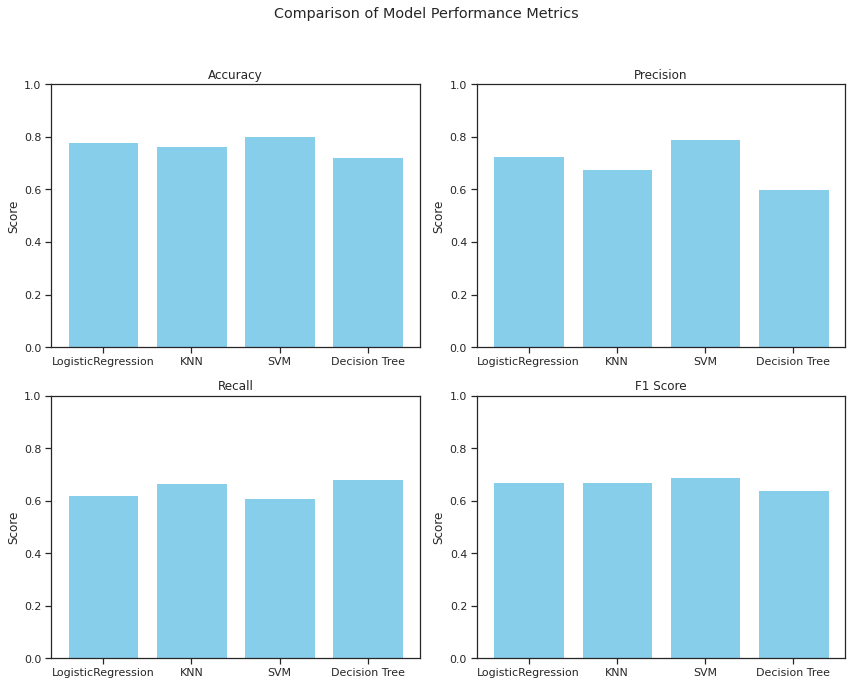

                Model  Accuracy  Precision    Recall  F1 Score
0  LogisticRegression  0.781250   0.728814  0.623188  0.671875
1                 KNN  0.765625   0.676471  0.666667  0.671533
2                 SVM  0.802083   0.792453  0.608696  0.688525
3       Decision Tree  0.723958   0.602564  0.681159  0.639456


In [52]:
# Visualize results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Comparison of Model Performance Metrics')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    ax.bar(results['Model'], results[metric], color='skyblue')
    ax.set_title(metric)
    ax.set_ylim(0, 1)
    ax.set_ylabel('Score')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display summary table
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df)

### Inference :
1. The SVM model has the highest accuracy, Precision and F1 Score among the four models.
2. Decision Tree has the best Recall score among the four models.

## Classification report by analyzing sensitivity, specificity, AUC (ROC curve)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       123
           1       0.74      0.58      0.65        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192

Sensitivity (True Positive Rate): 0.5797
Specificity (True Negative Rate): 0.8862
ROC-AUC: 0.8436


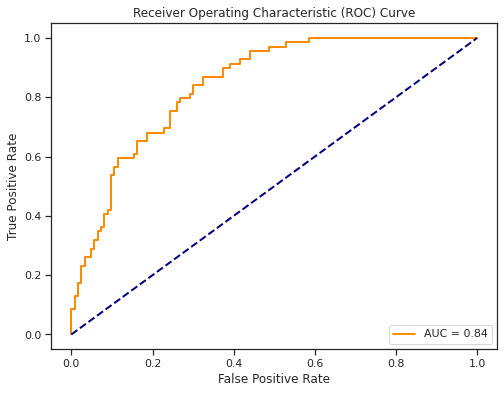

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

# Create and train an SVM classifier
svm_model = SVC(probability=True, kernel='linear')  
svm_model.fit(X_train, Y_train)

# Make predictions and probability estimates
Y_pred = svm_model.predict(X_test)
Y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

# Generate classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

# Calculate Sensitivity and Specificity
cm = confusion_matrix(Y_test, Y_pred)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])  # True Positive Rate or Recall
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")

# Calculate ROC-AUC
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Inference :
1. The model demonstrates good performance with high specificity (ability to correctly identify negatives) and moderate sensitivity (ability to correctly identify positives).
2. The ROC-AUC value of 0.8436 indicates strong discriminatory power, suggesting effective separation between positive and negative instances.